In [1]:
print("hi")

hi


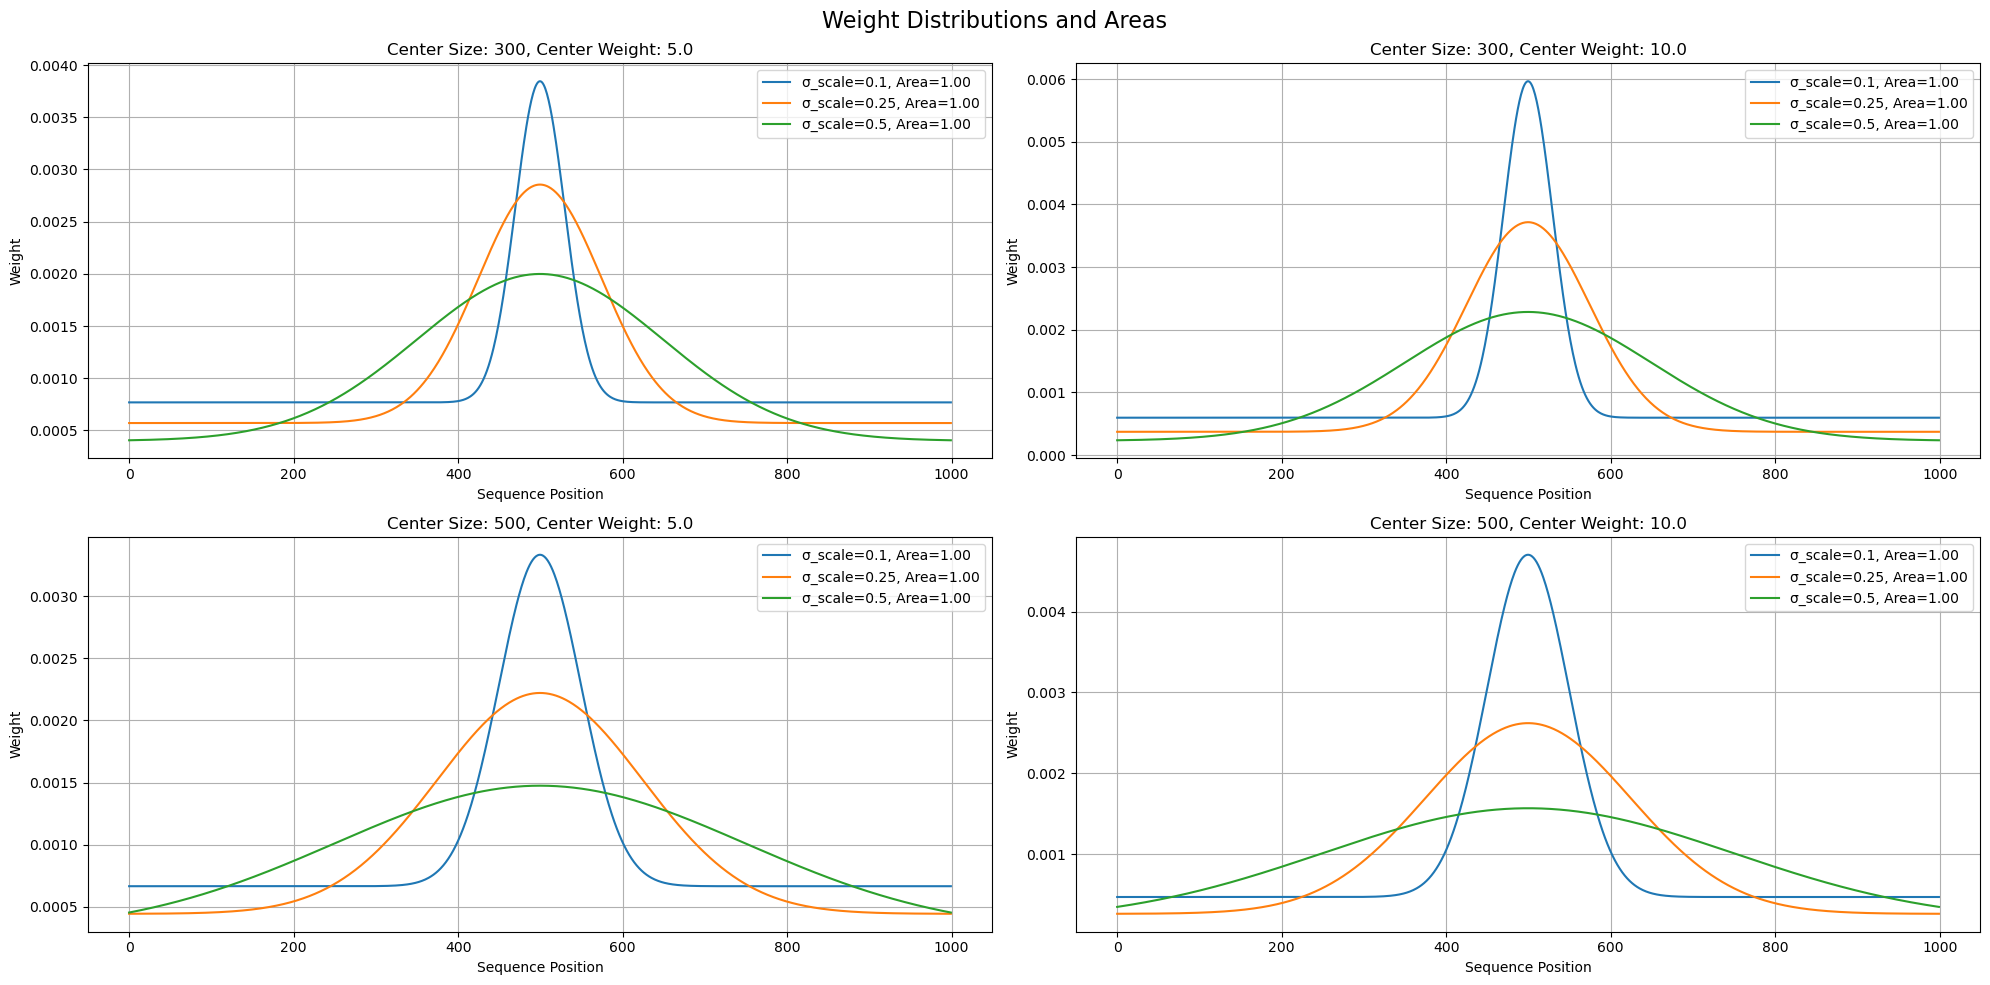

In [6]:
import torch
import torch.nn as nn
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps

class WeightedMSELoss(nn.Module):
    def __init__(self, sequence_length, center_size=500, center_weight=10.0, sigma_scale=0.25):
        super().__init__()
        self.sequence_length = sequence_length
        self.center_size = center_size
        self.center_weight = center_weight
        self.sigma_scale = sigma_scale
        self.weights = self._create_weights()

    def _create_weights(self):
        x = np.linspace(-self.sequence_length/2, self.sequence_length/2, self.sequence_length)
        mu = 0
        sigma = self.center_size * self.sigma_scale

        gaussian = norm.pdf(x, mu, sigma)
        gaussian_scaled = (self.center_weight - 1) * (gaussian / np.max(gaussian))
        weights = 1 + gaussian_scaled
        
        return torch.tensor(weights, dtype=torch.float32)/weights.sum()

def calculate_area(weights):
    return simps(weights.numpy(), dx=1)

def plot_and_analyze_weights(sequence_length, center_sizes, center_weights, sigma_scales):
    fig, axs = plt.subplots(len(center_sizes), len(center_weights), figsize=(20, 5*len(center_sizes)))
    fig.suptitle('Weight Distributions and Areas', fontsize=16)

    for i, center_size in enumerate(center_sizes):
        for j, center_weight in enumerate(center_weights):
            ax = axs[i, j] if len(center_sizes) > 1 else axs[j]
            
            for sigma_scale in sigma_scales:
                loss = WeightedMSELoss(sequence_length, center_size, center_weight, sigma_scale)
                weights = loss.weights
                area = calculate_area(weights)
                
                ax.plot(weights, label=f'σ_scale={sigma_scale}, Area={area:.2f}')
                
            ax.set_title(f'Center Size: {center_size}, Center Weight: {center_weight}')
            ax.set_xlabel('Sequence Position')
            ax.set_ylabel('Weight')
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
sequence_length = 1000
center_sizes = [300, 500]
center_weights = [5.0, 10.0]
sigma_scales = [0.1, 0.25, 0.5]

plot_and_analyze_weights(sequence_length, center_sizes, center_weights, sigma_scales)

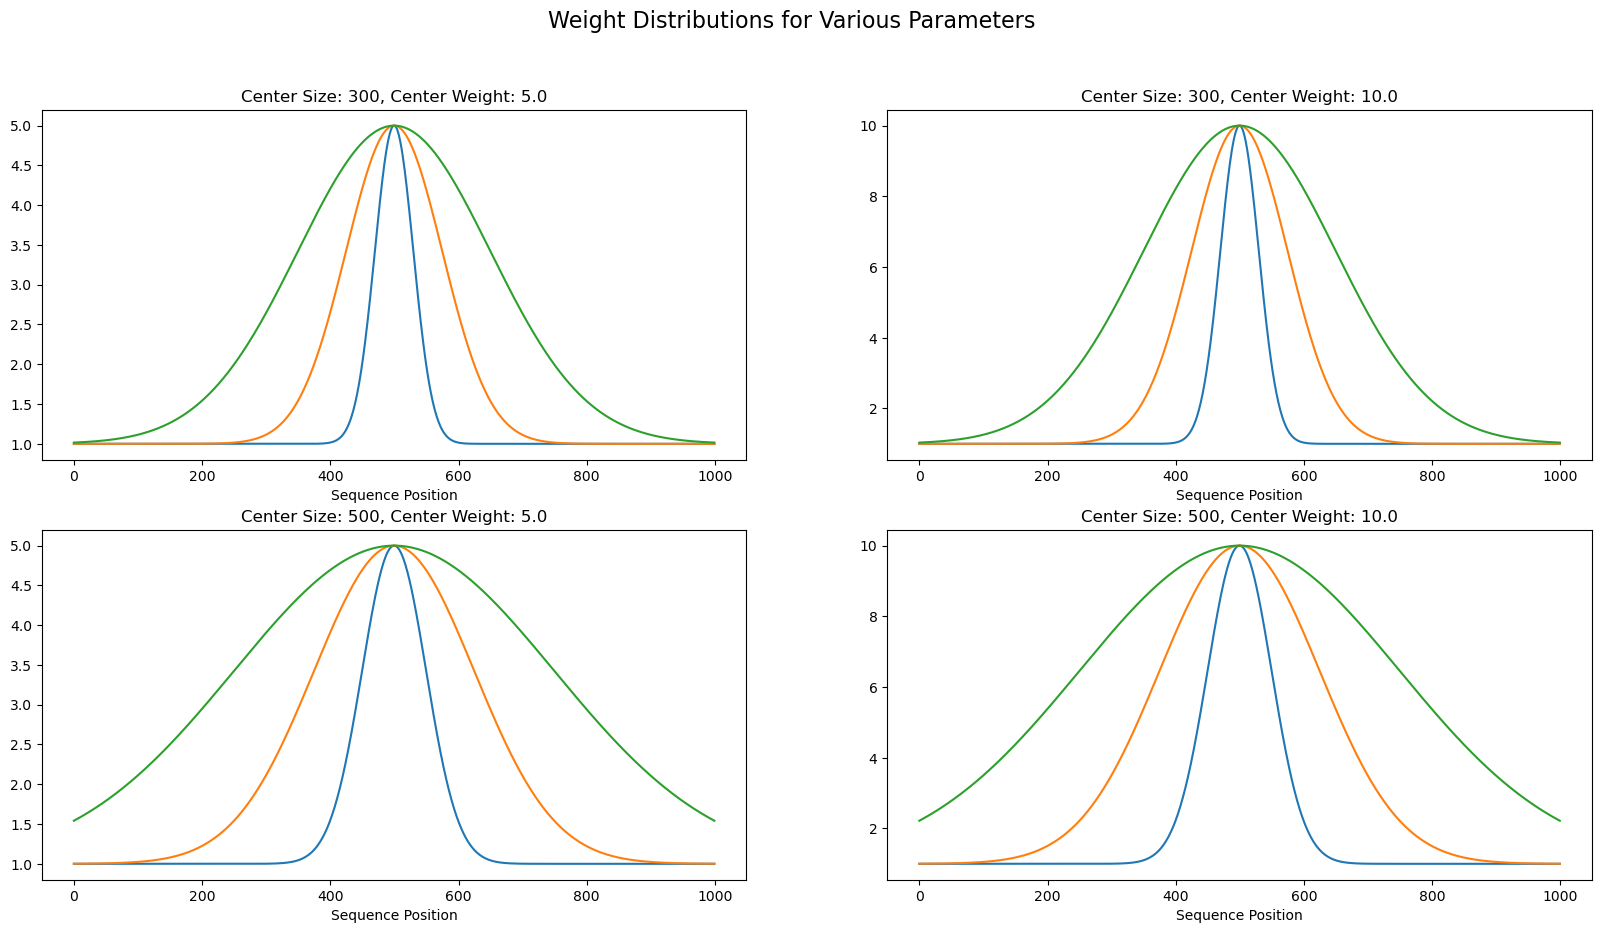

In [4]:
sequence_length = 1000
center_sizes = [300, 500]
center_weights = [5.0, 10.0]
sigma_scales = [0.1, 0.25, 0.5]

plot_weights(sequence_length, center_sizes, center_weights, sigma_scales)

In [7]:
weights.mean()

2.1279827235839504

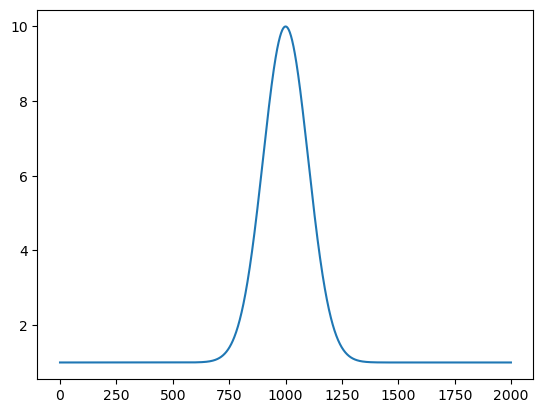

In [4]:
weights = create_weights(2000,500,10,0.2)
plt.plot(weights)

In [32]:
weights[750]

2.218017549129416

In [9]:
def plot_weights(sigma_scale, center_weight):
    sequence_length = 2000
    center_size = 500
    
    weights = create_weights(sequence_length, center_size, center_weight, sigma_scale)
    
    plt.figure(figsize=(12, 6))
    plt.plot(weights)
    plt.title(f"Weight Distribution (sigma_scale={sigma_scale:.2f}, center_weight={center_weight:.1f})")
    plt.xlabel("Sequence Position")
    plt.ylabel("Weight")
    plt.ylim(0, center_weight + 1)
    plt.axvline(x=250, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=750, color='r', linestyle='--', alpha=0.5)
    plt.text(500, 0.5, "Center 500", ha='center', va='bottom', color='r', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.show()

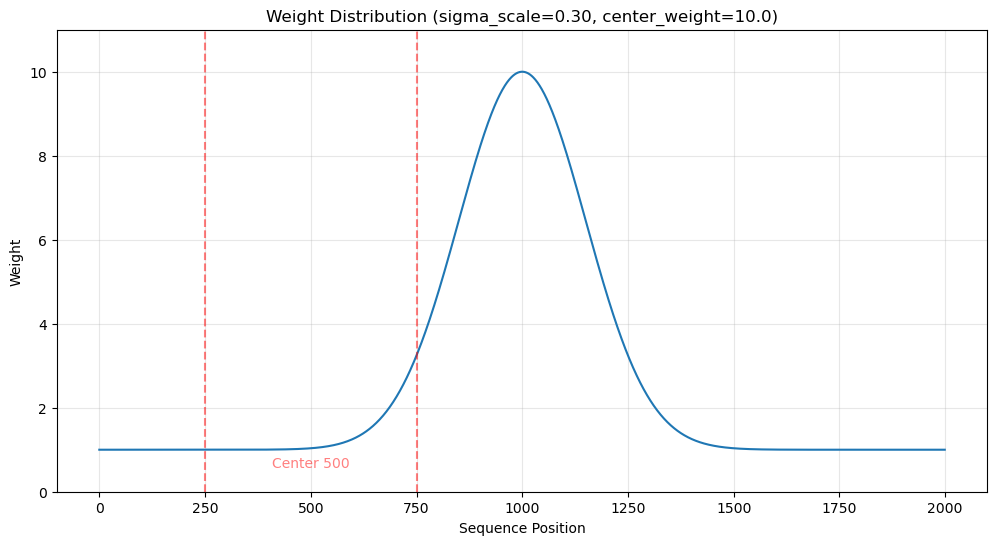

In [10]:
plot_weights(0.3,10)